# TPIR Showcase Showdown Statistical Simulations

In [1]:
import os, sys

sys.path.append(os.pardir)

In [2]:
from src.functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In this notebook we run a large number of simulations to confirm our probabilistic findings in `analysis.ipynb`.

In [3]:
wheel = [i for i in range(5, 101, 5)]

In [4]:
def stats_player1(choices=wheel, spin_again=True, spin_first=None,
                 opt_strategy=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 > 65:
            spin_again=False
        else:
            spin_again=True
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100:
            play1 = 0
        else:
            play1 = spin1 + spin2
    else:
        play1 = spin1
    return play1

In [5]:
stats_player1(spin_again=False)

65

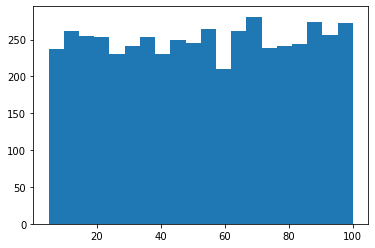

In [6]:
spins1 =  []
for _ in range(5000):
    spins1.append(stats_player1(spin_again=False))

plt.hist(spins1, bins=20);

In [7]:
def stats_player2(play1, choices=wheel, spin_again=True, spin_first=None,
                 opt_strategy=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 == play1:
            if play1 > 65:
                spin_again = False
        elif spin1 > 50:
            spin_again = False
        else:
            spin_again = True
    if spin1 < play1:
        spin_again = True
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100 or spin1 + spin2 < play1:
            play2 = 0
        else:
            play2 = spin1 + spin2
    else:
        play2 = spin1
    return play2

In [8]:
def stats_player3(leader, tie=False, choices=wheel, spin_again=True,
                  spin_first=None, opt_strategy=False, gofordollar=False):
    if spin_first is None:
        spin1 = np.random.choice(choices)
    else:
        spin1 = spin_first
    if opt_strategy:
        if spin1 == leader:
            if tie:
                if leader > 65:
                    spin_again = False
                else:
                    spin_again = True
            else:
                if leader > 50:
                    spin_again = False
                else:
                    spin_again = True
    if spin1 < leader:
        spin_again = True
    if leader == 0:
        spin_again = False
    if spin1 > leader:
        if gofordollar == True:
            spin_again = True
        else:
            spin_again = False
    if spin_again:
        spin2 = np.random.choice(choices)
        if spin1 + spin2 > 100 or spin1 + spin2 < leader:
            play3 = 0
        else:
            play3 = spin1 + spin2
    else:
        play3 = spin1
    return play3

In [9]:
def showcase_showdown(plr1_first, plr1_again, plr2_first, plr2_again,
                      plr3_first, plr3_again, plr1os=False, plr2os=False,
                      plr3os=False, plr3gfd=False, tie=False):
    import numpy as np
    wheel = [i for i in range(5, 101, 5)]
    plr1 = stats_player1(spin_again=plr1_again, spin_first=plr1_first,
                        opt_strategy=plr1os)
    plr2 = stats_player2(play1=plr1, spin_again=plr2_again,
                         spin_first=plr2_first, opt_strategy=plr2os)
    if plr1 > plr2:
        leader = plr1
    else:
        leader = plr2
    plr3 = stats_player3(leader, spin_again=plr3_again,
                         spin_first=plr3_first, opt_strategy=plr3os,
                         gofordollar=plr3gfd, tie=tie)
    
    score_dict = dict(enumerate([plr1, plr2, plr3], start=1))
    
    wnr = {k: v for k, v in score_dict.items() if v == max(score_dict.values())}
    
    if len(wnr) > 1:
        return np.random.choice([k for k in wnr.keys()])
    else:
        return [k for k in wnr.keys()][0]

In [10]:
showcase_showdown(5, False, 10, False, 20, True)

3

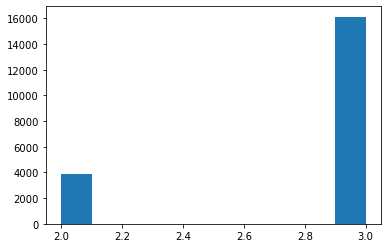

In [11]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(20, False, 45, False, None, True))
plt.hist(results);

### Player1 Spins 60

#### Stay

Player1 won 11.62% of the time.


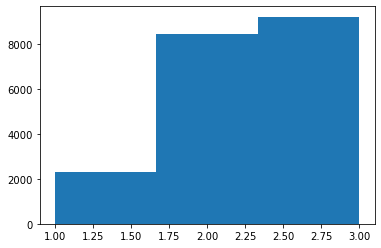

In [12]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player1 won 18.78% of the time.


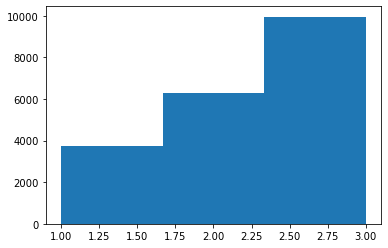

In [13]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 1 Spins 65

#### Stay

Player1 won 16.035% of the time.


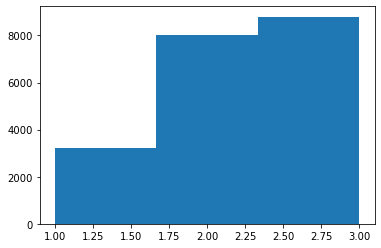

In [14]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

####  Spin Again

Player1 won 17.95% of the time.


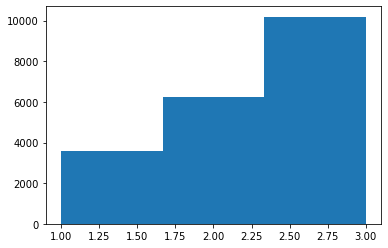

In [15]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 1 Spins 70

#### Stay

Player1 won 21.375% of the time.


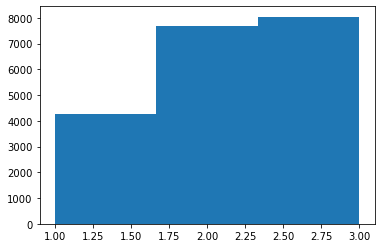

In [16]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player1 won 16.88% of the time.


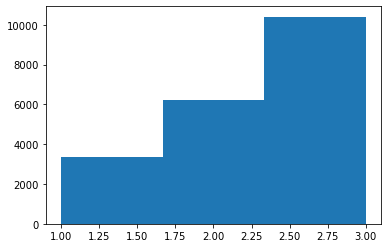

In [17]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, True, None, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")

### Player 2 Spins 50

#### Stay

Player2 won 23.935% of the time.


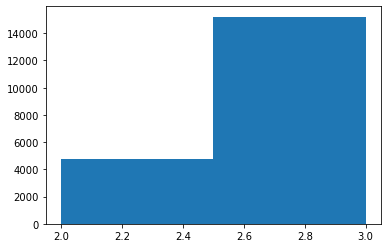

In [18]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 50, False, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player2 won 29.895% of the time.


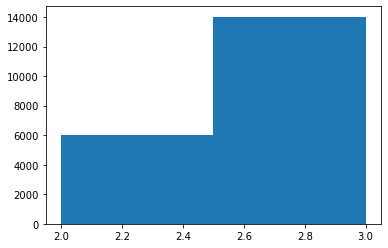

In [19]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 50, True, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

### Player 2 Spins 55

#### Stay

Player2 won 28.395% of the time.


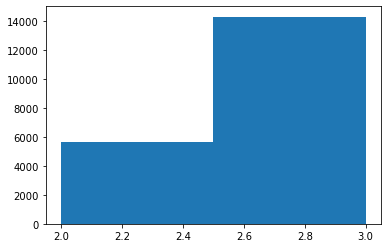

In [20]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 55, False, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

#### Spin Again

Player2 won 28.005% of the time.


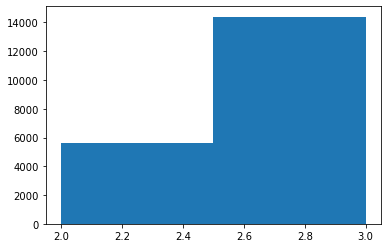

In [21]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(0, False, 55, True, None, False))
hist = plt.hist(results, bins=2)
print(f"Player2 won {hist[0][0]/200}% of the time.")

### Results with Optimal Strategy

Player1 won 30.325% of the time.
Player2 won 33.29% of the time.
Player3 won 36.385% of the time.


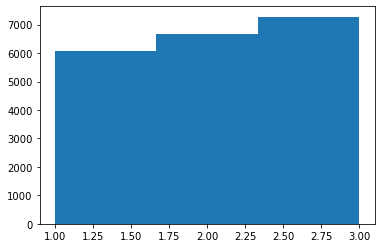

In [22]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(None, False, None, False, None, False,
                                     plr1os=True, plr2os=True, plr3os=True))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

Player1 won 37.835% of the time.
Player2 won 42.105% of the time.
Player3 won 20.06% of the time.


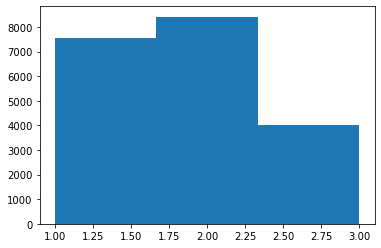

In [23]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(None, False, None, False, None, False,
                                     plr1os=True, plr2os=True, plr3gfd=True))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

### Optimal Strategy for Player 2 if the First Spin Ties Player 1

#### 55 Cents, Stay

Player1 won 15.375% of the time.
Player2 won 14.895% of the time.
Player3 won 69.73% of the time.


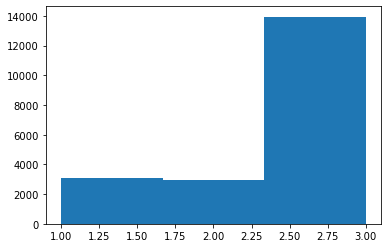

In [24]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(55, False, 55, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 55 Cents, Spin Again

Player1 won 16.245% of the time.
Player2 won 27.83% of the time.
Player3 won 55.925% of the time.


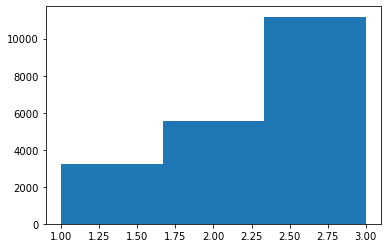

In [25]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(55, False, 55, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 60 Cents, Stay

Player1 won 17.535% of the time.
Player2 won 17.73% of the time.
Player3 won 64.735% of the time.


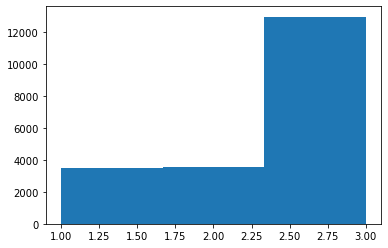

In [26]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, 60, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 60 Cents, Spin Again

Player1 won 20.87% of the time.
Player2 won 26.205% of the time.
Player3 won 52.925% of the time.


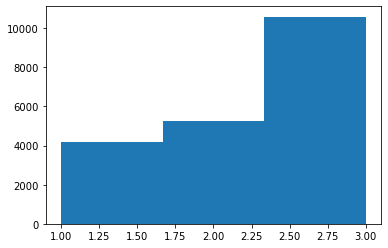

In [27]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(60, False, 60, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 65 Cents, Stay

Player1 won 20.955% of the time.
Player2 won 20.85% of the time.
Player3 won 58.195% of the time.


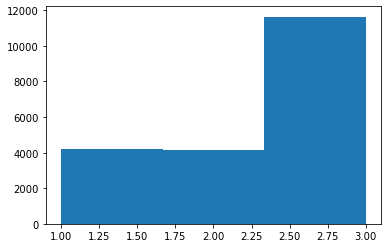

In [28]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, 65, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 65 Cents, Spin Again

Player1 won 26.085% of the time.
Player2 won 24.195% of the time.
Player3 won 49.72% of the time.


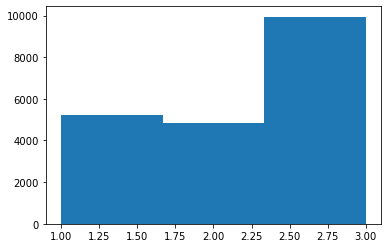

In [29]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(65, False, 65, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 70 Cents, Stay

Player1 won 23.605% of the time.
Player2 won 23.78% of the time.
Player3 won 52.615% of the time.


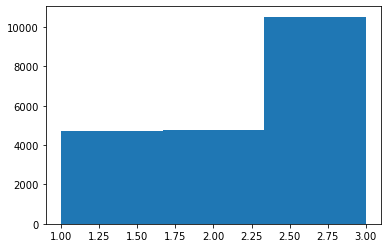

In [30]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, 70, False, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")

#### 70 Cents, Spin Again

Player1 won 32.54% of the time.
Player2 won 21.7% of the time.
Player3 won 45.76% of the time.


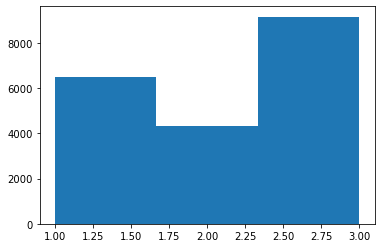

In [31]:
results = []
for _ in range(20000):
    results.append(showcase_showdown(70, False, 70, True, None, False))
hist = plt.hist(results, bins=3)
print(f"Player1 won {hist[0][0]/200}% of the time.")
print(f"Player2 won {hist[0][1]/200}% of the time.")
print(f"Player3 won {hist[0][2]/200}% of the time.")